<a href="https://colab.research.google.com/github/kkk020719/DFT_Fall24/blob/main/GradDFT_TrainEx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install git+https://github.com/XanaduAI/GradDFT.git
!pip install torch_geometric
!pip install optax==0.2.0
!pip install jax==0.4.20 jaxlib==0.4.20
!pip install scipy==1.9.0
!pip list | grep jax

  Cloning https://github.com/XanaduAI/GradDFT.git to /tmp/pip-req-build-td1hni96
  Running command git clone --filter=blob:none --quiet https://github.com/XanaduAI/GradDFT.git /tmp/pip-req-build-td1hni96
  Resolved https://github.com/XanaduAI/GradDFT.git to commit 941afc28a6b24477369d638b07ca64c6a46365ba
  Preparing metadata (setup.py) ... done
  Using cached jax-0.4.35-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.35-cp310-cp310-manylinux2014_x86_64.whl.metadata (983 bytes)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached jaxlib-0.4.34-cp310-cp310-manylinux2014_x86_64.whl.metadata (983 bytes)
  Using cached jax-0.4.34-py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing instal

  Using cached jax-0.4.20-py3-none-any.whl.metadata (23 kB)
  Using cached jaxlib-0.4.20-cp310-cp310-manylinux2014_x86_64.whl.metadata (2.1 kB)
Using cached jax-0.4.20-py3-none-any.whl (1.7 MB)
Using cached jaxlib-0.4.20-cp310-cp310-manylinux2014_x86_64.whl (85.8 MB)
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.34
    Uninstalling jaxlib-0.4.34:
      Successfully uninstalled jaxlib-0.4.34
  Attempting uninstall: jax
    Found existing installation: jax 0.4.34
    Uninstalling jax-0.4.34:
      Successfully uninstalled jax-0.4.34
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.87 requires jax>=0.4.27, but you have jax 0.4.20 which is incompatible.
chex 0.1.87 requires jaxlib>=0.4.27, but you have jaxlib 0.4.20 which is incompatible.
flax 0.8.5 requires jax>=0.4.27, but you have jax 0.4.20 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 87.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.9.0 which is incompatible.
chex 0.1.87 requires jax>=0.4.27, but you have jax 0.4.20 which is incompatible.
chex 0.1.87 requires jaxlib>=0.4.27, but you have jaxlib 0.4.20 which is incompatible.
flax 0.8.5 requires jax>=0.4.27, but you have jax 0.4.20 which is incompatible.


jax                                0.4.20
jax-cuda12-pjrt                    0.4.33
jax-cuda12-plugin                  0.4.33
jaxlib                             0.4.20
jaxtyping                          0.2.36


In [ ]:
#import os

# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Create a folder in the root directory
#!mkdir -p "/content/drive/My Drive/Ethanol_data_MD17"

In [1]:
from torch_geometric.datasets import md17
import jax
from jax import numpy as jnp
from jax import grad, jit, vmap
from jax import random
import math
import pdb
import numpy as np

import grad_dft as gd

from grad_dft.functional import canonicalize_inputs, dm21_coefficient_inputs, dm21_densities

from grad_dft import (
	energy_predictor,
	simple_energy_loss,
	NeuralFunctional,
	molecule_from_pyscf,
  Functional,
	constraints,
	canonicalize_inputs,
)

from pyscf import gto, dft

from jax.nn import sigmoid, gelu
from jax.random import PRNGKey
from jax import value_and_grad
from flax import linen as nn
from optax import adam, apply_updates, exponential_decay
from tqdm import tqdm
from jax.flatten_util import ravel_pytree
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/grad_dft/molecule.py:344: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  def orbital_grad(
/usr/local/lib/python3.10/dist-packages/grad_dft/molecule.py:388: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usual

In [2]:
if hasattr(jax, 'tree'):
    print("JAX has the tree module.")
else:
    print("JAX does not have the tree module.")


if hasattr(jax, 'tree_map'):
    print("JAX has the tree_map function.")
else:
    print("JAX does not have the tree_map function.")

JAX does not have the tree module.
JAX has the tree_map function.


# Training using GradDFT and direct optimization

In this notebook example, we will run through the different strategies that can be used to train a Neural functional for the exchange-correlation functional in Grad DFT. Using molecules such as ethanol as training molecules, we will study how a neural functional can generalize to calculating the total energy. More generally, the workflow is:


1.   Generate molecule train/test dataset and acquire required properties.
2.   Use GradDFT library to train the neural network for the coefficients corresponding to energy densities (We use LDA for energy densities) which together forms the exchange-correlation functional under integration
3.  After training, we test the learned functional to try to predict the energy for the test conformations using SCF or direct optimization. For example, by directly minimizing
$$
min_{C} E(C)
$$
subject to the orthonormality constraint of the molecular orbitals
$$
C^TSC = 1.
$$


## Generate Training/Testing Data

The data were acuiqred from MD17 dataset. According to their documentation, the energies of molecules of MD17 dataset were calculated at the PBE/def2-SVP level of theory using very tight SCF convergence and very dense DFT integration grid. We provide functions below to acquire data and return corresponding PySCF/GradDFT objects for future use

In [3]:
ethanol_dataset = md17.MD17(root='.', name='ethanol')

Processing...
Done!


In [4]:
def obtain_data(num_data, data_set, atomic_symbols):
  'Takes a number of molecules randomly from dataset provided and returning the PySCF/GradDFT molecule objects'
  molecules = []
  ground_energies = []
  #Randomly select a number of indices
  indices = np.random.choice(len(data_set), num_data, replace=False) #choose uniformly
  selected_samples = [data_set[i] for i in indices]
  counter = 1
  # Define atomic symbols for the corresponding atomic numbers in MD17 dataset for ethanol
  for sample in selected_samples:
    position = sample.pos
    atomic_number = sample.z

    # Start building the molecule description string
    atom_desc = ''
    for z, pos in zip(atomic_number, position):
      #print(z.item())
      #print(pos)
      if z.item() in atomic_symbols:
        symbol = atomic_symbols[z.item()]  # Get symbol using atomic number
        atom_desc += f'{symbol} {pos[0]:.4f} {pos[1]:.4f} {pos[2]:.4f}\n'
      else:
        raise ValueError(f"Unrecognized atomic number {z.item()} found, unable to proceed with molecule creation.")
    # Create a PySCF molecule object
    mol = gto.M(atom=atom_desc, basis='def2-svp', unit='Ang', spin = 0, verbose=0) #setting up according to the documation of original data set
    mf = dft.RKS(mol)
    #temp = mf.get_ovlp()
    mf.kernel()
    molecule = molecule_from_pyscf(mf)
    molecules.append(molecule)
    print('We are at number:' + str(counter))
    ground_energies.append(sample.energy.item()/627.509) #unit conversion from kcal/mol to Hartree
    counter += 1
  return molecules, ground_energies

#loading PySCF data from MD17
ethanol_atomic_symbols = {1: 'H', 6: 'C', 8: 'O'}
train_data, ground_energy_train  = obtain_data(2, ethanol_dataset, ethanol_atomic_symbols)
#test_data, ground_energy_test = obtain_data(2, ethanol_dataset, ethanol_atomic_symbols)

We are at number:1
We are at number:2


In [ ]:
print((train_data[0].rdm1))

[[[ 1.0353788e+00 -7.1560204e-02 -8.1028529e-02 ...  6.4449290e-05
   -1.3912033e-03 -2.5423581e-04]
  [-7.1560204e-02  2.7252427e-01  6.7375220e-02 ... -1.6549071e-03
    2.4816061e-03 -1.9924720e-03]
  [-8.1028529e-02  6.7375220e-02  3.3840325e-02 ... -2.6163461e-03
    6.3913752e-04 -5.5739534e-04]
  ...
  [ 6.4449290e-05 -1.6549071e-03 -2.6163461e-03 ...  9.3726866e-04
    4.6705969e-05 -1.7654274e-04]
  [-1.3912033e-03  2.4816061e-03  6.3913752e-04 ...  4.6705969e-05
    1.7476031e-03  9.3158647e-05]
  [-2.5423581e-04 -1.9924720e-03 -5.5739534e-04 ... -1.7654274e-04
    9.3158647e-05  9.5177034e-04]]

 [[ 1.0353788e+00 -7.1560204e-02 -8.1028529e-02 ...  6.4449290e-05
   -1.3912033e-03 -2.5423581e-04]
  [-7.1560204e-02  2.7252427e-01  6.7375220e-02 ... -1.6549071e-03
    2.4816061e-03 -1.9924720e-03]
  [-8.1028529e-02  6.7375220e-02  3.3840325e-02 ... -2.6163461e-03
    6.3913752e-04 -5.5739534e-04]
  ...
  [ 6.4449290e-05 -1.6549071e-03 -2.6163461e-03 ...  9.3726866e-04
    4.6705

## Training Phase

In [10]:
def energy_densities(molecule):
    rho = molecule.density()
    lda_e = -3/2 * (3/(4*jnp.pi))**(1/3) * (rho**(4/3)).sum(axis = 1, keepdims = True) #
    return lda_e

def coefficient_inputs(molecule, clip_cte = 1e-40):
    rho = molecule.density()
    # We need to clip rho away from 0 to obtain good gradients.
    rho = jnp.maximum(abs(rho), clip_cte) * jnp.sign(rho)
    grad_rho = molecule.grad_density()
    tau = molecule.kinetic_density()
    grad_rho_norm = jnp.sum(grad_rho**2, axis=-1) # \sum_j^{spin=2} (grad_rho_{ij})^2
    grad_rho_norm_sumspin = jnp.sum(grad_rho.sum(axis=1, keepdims=True) ** 2, axis=-1) # (\sum_j^{spin=2} (grad_rho_{ij}))^2
    features = jnp.concatenate((rho, grad_rho_norm_sumspin, grad_rho_norm, tau), axis=1)
    return features

# def coefficients(self, rhoinputs):
#     x = nn.Dense(features=2)(rhoinputs)
#     x = nn.LayerNorm()(x)
#     return gelu(x) # using gelu as activation function

class MLP(nn.Module):
    features: int = 2

    def setup(self):
      self.dense = nn.Dense(self.features)
      self.norm = nn.LayerNorm()

    def __call__(self, rhoinputs, *args):
      x = self.dense(*args)
      x = self.norm(x)
      return gelu(x)

coefficients = MLP(features=2)

neuralfunctional = NeuralFunctional(coefficients, energy_densities, coefficient_inputs)

In [11]:
seed = 40
key = jax.random.PRNGKey(seed)
cinputs = [coefficient_inputs(molecule) for molecule in train_data]
params_train = [neuralfunctional.init(key, each_cinputs) for each_cinputs in cinputs]
# print(params_train[0]['params'])
# print(params_train[0]['params']['Dense_0']['kernel'].shape)

#predicted_energy = neuralfunctional.energy(params, molecule)

In [12]:
# Define optimizer
# batch_size = 32
n_epochs, learning_rate, momentum = 100, 1e-2, 0.9
schedule = exponential_decay(init_value=1e-2, transition_steps=20, decay_rate=0.9, staircase=True)
optimizer = adam(learning_rate=learning_rate, b1=momentum)
#opt_state = optimizer.init(params_train)
opt_state = [optimizer.init(params) for params in params_train] # init for each training molecule
compute_energy = energy_predictor(neuralfunctional)
state = (params_train, opt_state) # params_train is a list with each train moluecule params
#print(state[1])
converging_energies = [] # this includes every energy of all training molecules for each epoch
losses = []

@value_and_grad
def SEloss(params, compute_energy, molecule, trueenergy):
    predictedenergy, fock_matrix = compute_energy(params, molecule) #returns both the xc and fock matrix
    #print(f'now predictedenergy is {predictedenergy.primal} and trueenergy is {trueenergy}')
    converging_energies.append(predictedenergy)
    return (predictedenergy - trueenergy) ** 2 #sqaured error used

In [13]:
def sum_gradients(grad_list):
    grad_sum = grad_list[0]
    for grads in grad_list[1:]:
        grad_sum = jax.tree_map(jnp.add, grad_sum, grads)
    return grad_sum

def average_gradients(grad_list):
    """ Average gradients across grad_list. """
    # Sum all gradients
    grad_sum = sum_gradients(grad_list)

    # Divide each gradient by the number of batches to get the average
    num_grad = len(grad_list)
    average_grad = jax.tree_map(lambda x: x / num_grad, grad_sum)

    return average_grad


def train_epoch(state, optimizer):
    r"""Train for a single epoch."""
    params, opt_state = state
    train_loss = []
    train_grad = []
    for param, molecule, trueenergy in zip(params, train_data, ground_energy_train):
        loss, grads = SEloss(param, compute_energy, molecule, trueenergy)
        train_loss.append(loss)
        train_grad.append(grads)

    loss, grads = jnp.mean(jnp.array(train_loss)), average_gradients(train_grad)
    losses.append(loss)
    print()
    print(loss)

    for i in range(len(opt_state)):
      updates, opt_state[i] = optimizer.update(grads, opt_state[i])
      params[i] = apply_updates(params[i], updates)

    state = (params, opt_state)
    return state, loss
i = 0
for iteration in tqdm(range(n_epochs), desc='Training epoch'):

    state, loss = train_epoch(state, optimizer)
    if loss < 1e-3:
      i += 1
      if i == 5:
        break

Training epoch:   1%|          | 1/100 [00:12<21:18, 12.91s/it]


82.411575


Training epoch:   2%|▏         | 2/100 [00:26<21:38, 13.26s/it]


71.6445


Training epoch:   3%|▎         | 3/100 [00:39<21:31, 13.32s/it]


64.76906


Training epoch:   4%|▍         | 4/100 [00:53<21:17, 13.31s/it]


57.966644


Training epoch:   5%|▌         | 5/100 [01:06<20:55, 13.22s/it]


51.560257


Training epoch:   6%|▌         | 6/100 [01:19<20:37, 13.17s/it]


45.594475


Training epoch:   7%|▋         | 7/100 [01:32<20:19, 13.11s/it]


40.0278


Training epoch:   8%|▊         | 8/100 [01:45<20:02, 13.07s/it]


34.851685


Training epoch:   9%|▉         | 9/100 [02:04<22:47, 15.03s/it]


30.087337


Training epoch:  10%|█         | 10/100 [02:39<31:49, 21.21s/it]


25.647682


Training epoch:  11%|█         | 11/100 [03:06<33:54, 22.86s/it]


21.60712


Training epoch:  12%|█▏        | 12/100 [03:19<29:21, 20.02s/it]


17.962967


Training epoch:  13%|█▎        | 13/100 [03:32<25:57, 17.91s/it]


14.694353


Training epoch:  14%|█▍        | 14/100 [03:45<23:34, 16.44s/it]


11.800131


Training epoch:  15%|█▌        | 15/100 [03:58<21:49, 15.41s/it]


9.274812


Training epoch:  16%|█▌        | 16/100 [04:11<20:31, 14.66s/it]


7.093526


Training epoch:  17%|█▋        | 17/100 [04:24<19:36, 14.18s/it]


5.2618046


Training epoch:  18%|█▊        | 18/100 [04:37<18:52, 13.82s/it]


3.7348967


Training epoch:  19%|█▉        | 19/100 [04:50<18:18, 13.56s/it]


2.476943


Training epoch:  20%|██        | 20/100 [05:03<17:52, 13.41s/it]


1.520935


Training epoch:  21%|██        | 21/100 [05:16<17:30, 13.30s/it]


0.79331946


Training epoch:  22%|██▏       | 22/100 [05:29<17:11, 13.22s/it]


0.3039347


Training epoch:  23%|██▎       | 23/100 [05:42<16:52, 13.15s/it]


0.06551007


Training epoch:  23%|██▎       | 23/100 [05:55<19:51, 15.47s/it]


7.262977e-05


In [15]:
print(converging_energies[0].primal)

-145.81656


Plotting for the trained data (above) convergence

24


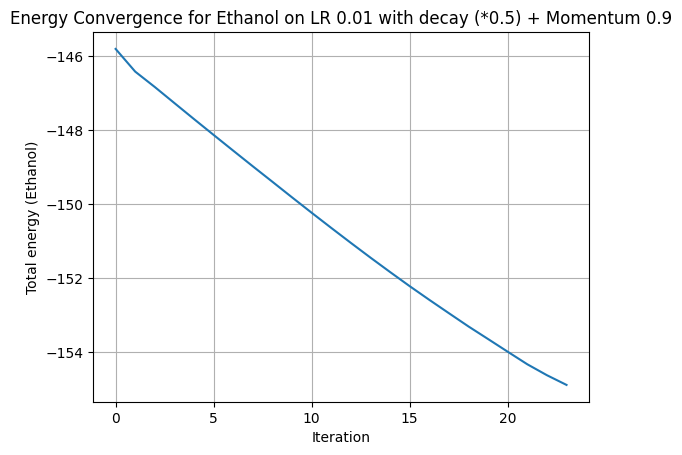

In [18]:
converging_energies = [energy.primal for energy in converging_energies]
avg_converging_energies = []
for i in range(0, len(converging_energies), len(train_data)):
    avg_converging_energies.append(np.mean(converging_energies[i:i+len(train_data)]))
print(len(avg_converging_energies))
# Create a list of iteration numbers
iterations = list(range(len(avg_converging_energies)))

# Plot the energy values over iterations
plt.plot(iterations, avg_converging_energies)
plt.xlabel('Iteration')
plt.ylabel('Total energy (Ethanol)')
plt.grid(True)
plt.title('Energy Convergence')
plt.title(f'Energy Convergence for Ethanol on LR {learning_rate} with decay (*0.5) + Momentum {momentum}')

# Show the plot
plt.show()

## Testing Phase


SCF Testing

Based on
$$
F(C)C = SC\epsilon
$$

where F is the fock matrix, constructed using the trained param in the above sections. The general workflow is the following:


1.   For the trained param, use it to construct an updated Fock matrix and solve the spectral problem using also the overlap matrix which would be the same throughout this process
2.   Obtain an updated C matrix which would be used to construct the reduced density matrix $\Gamma$
3.   Use the updated reduced density matrix to construct a new Fock matrix



In [30]:
# from jax.scipy.linalg import eigh
from scipy.linalg import eigh

In [31]:
def compute_total_energy(rdm1, molecule, params):
  molecule = molecule.replace(rdm1=rdm1)
  return neuralfunctional.energy(params, molecule)
test_data, ground_energy_test = obtain_data(2, ethanol_dataset, ethanol_atomic_symbols)

# test_data, ground_energy_test = obtain_data(1, ethanol_dataset, ethanol_atomic_symbols)
# overlap_matricies = [mol.s1e for mol in test_data]
# fock_matricies = [grad(compute_energy, argnums=0)(mol.rdm1, mol, params) for mol in test_data]

# #print(test_data[0].rdm1.shape)
# #print(fock_matricies[0][0].shape)
# #print(overlap_matricies[0].shape)

# epsilon_up, C_up = eigh(fock_matricies[0][0], overlap_matricies[0])
# epsilon_down, C_down = eigh(fock_matricies[0][1], overlap_matricies[0])

# # eigenvalues are the orbital energies
# # eigenvectors are the molecular orbitals
# print("Orbital Energies (Eigenvalues):", epsilon_down.shape)
# print("Molecular Orbitals (Eigenvectors):\n", C_down.shape)

We are at number:1
We are at number:2


In [ ]:
def scf_iteration(rdm1):
  """ 1 SCF iteration. """
  new_rdm1 = []
  overlap_matricies = [mol.s1e for mol in test_data] # stays the same
  fock_matricies = [grad(compute_total_energy, argnums=0)(rdm1[i], mol, params) for i,mol in enumerate(test_data)]
  for i, fock in enumerate(fock_matricies):
    fock_up = fock[0]
    fock_down = fock[1]
    epsilon_up, C_up = eigh(fock_up, overlap_matricies[i])
    epsilon_down, C_down = eigh(fock_down, overlap_matricies[i])
    rdm1_up = jnp.dot(C_up, C_up.T)
    rdm1_down = jnp.dot(C_down, C_down.T)
    rdm1_new = jnp.stack([rdm1_up, rdm1_down], axis=0)
    new_rdm1.append(jnp.array(rdm1_new))
  updated_energy = [compute_total_energy(new_rdm1[i], mol, params) for i,mol in enumerate(test_data)]
  return new_rdm1, updated_energy

params = state[0][0]
# x = compute_energy(test_data[0].rdm1, test_data[0], params)
# print(x)
max_scf_iteration = 200
rdm1 = [test_data[i].rdm1 for i in range(len(test_data))]
scf_energy_list = []
non_decreasing_counter = 0
previous_energy = float('inf')  # Initialize with a large number
# print(test_data[0].rdm1)
for iteration in tqdm(range(max_scf_iteration), desc='SCF Iteration'):
  rdm1, updated_energy = scf_iteration(rdm1)
  scf_energy_list.append(updated_energy)
  # Print the updated energy at each iteration
  # print(rdm1[0])
  print(f"\nIteration {iteration}: SCF_Energy = {updated_energy} | Actual_Energy = {ground_energy_test}")

  # # Check if the updated energy has decreased
  # if updated_energy < previous_energy:
  #   non_decreasing_counter = 0  # Reset counter on decrease
  # else:
  #   non_decreasing_counter += 1  # Increment counter if not decreased

  # # Update the previous energy to the current
  # previous_energy = updated_energy

  # # Stop the loop if energy hasn't decreased in 5 consecutive iterations
  # if non_decreasing_counter >= 5:
  #   print("Energy has not decreased for 5 consecutive iterations. Stopping SCF iterations.")
  #   break

Direct Minimization Testing

In [ ]:
params = state[0][0]

# test_data, ground_energy_test = obtain_data(3, ethanol_dataset, ethanol_atomic_symbols)

n_epochs, learning_rate, momentum = 200, 1e-2, 0.9
schedule = exponential_decay(init_value=1e-2, transition_steps=25, decay_rate=0.5, staircase=True)
optimizer_train = adam(learning_rate=schedule, b1=momentum)

opt_state_train = optimizer_train.init(params)
compute_energy_train = energy_predictor(neuralfunctional)

In [ ]:
@value_and_grad
def total_energy(params, compute_energy, molecule, trueenergy):
  predictedenergy, fock_matrix = compute_energy(params, molecule) #returns both the xc and fock matrix
  return (predictedenergy - trueenergy) ** 2 #sqaured error used